<a href="https://colab.research.google.com/github/NipunSharma13028/HOUSE-PREDICTION-PROJECT/blob/main/HOUSE_PREDICTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [4]:
df = pd.read_csv("MagicBricks.csv")
df.head(n = 5)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [5]:
df.describe()


,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [7]:
df.shape


(1259, 11)

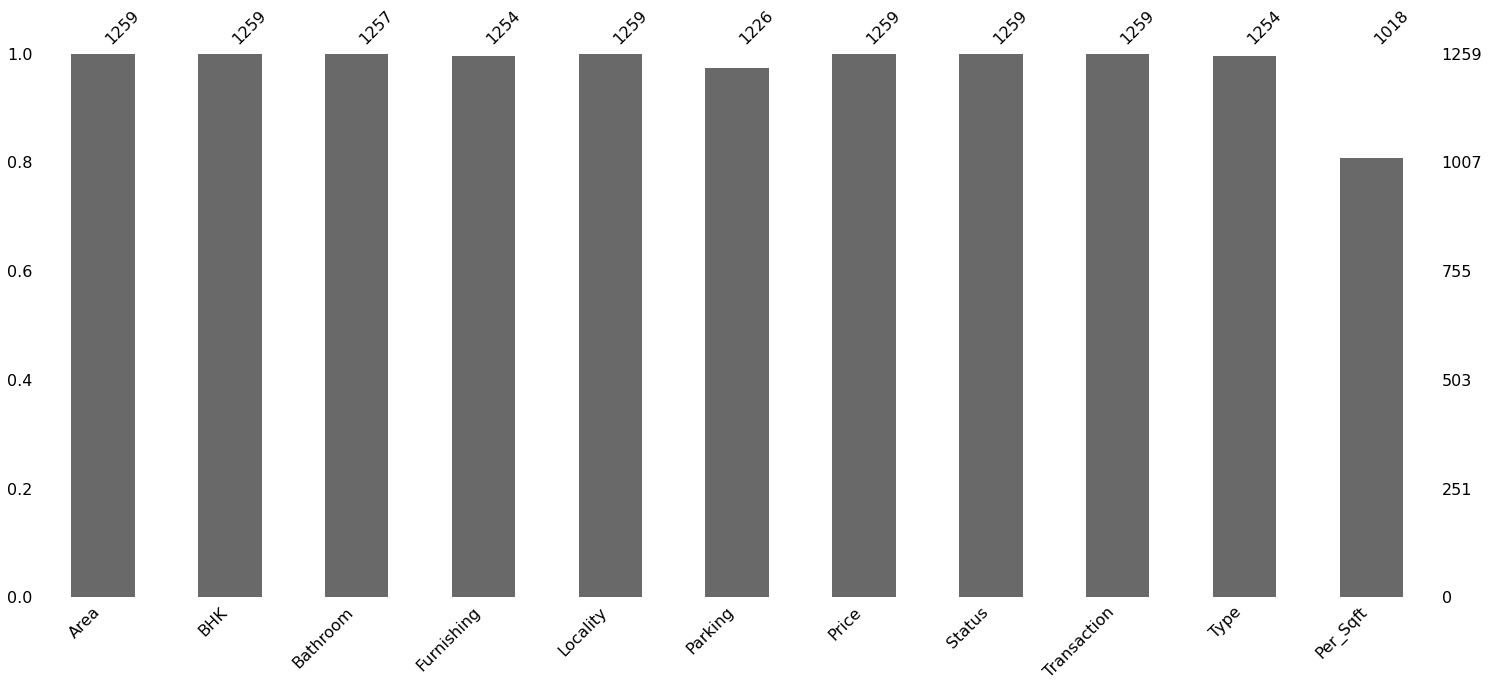

In [8]:
import missingno as msno
msno.bar(df)
plt.show()

DATA **CLEANING**

In [9]:
df.isnull().sum()


Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [10]:
duplicate = df[df.duplicated()]
duplicate

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
84,1540.0,3,3.0,Semi-Furnished,"Nav Kairali Apartment, Dwarka Sector 3",1.0,14500000,Ready_to_move,Resale,Apartment,3524.0
92,1450.0,3,3.0,Semi-Furnished,Lajpat Nagar 3,2.0,30000000,Ready_to_move,New_Property,Builder_Floor,NaN
110,1000.0,2,2.0,Furnished,Lajpat Nagar 3,1.0,20000000,Ready_to_move,Resale,Apartment,20000.0
120,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,NaN
122,1710.0,3,3.0,Semi-Furnished,Lajpat Nagar 2,4.0,26000000,Ready_to_move,New_Property,Builder_Floor,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1164,1300.0,2,2.0,Semi-Furnished,"Yamuna Apartment, Alaknanda",1.0,15000000,Ready_to_move,Resale,Apartment,11538.0
1165,1200.0,2,2.0,Unfurnished,"Nilgiri Apartment, Alaknanda",1.0,14300000,Ready_to_move,Resale,Apartment,11538.0
1166,1300.0,3,2.0,Unfurnished,"Nilgiri Apartment, Alaknanda",1.0,18500000,Ready_to_move,Resale,Apartment,11538.0
1167,1400.0,3,3.0,Furnished,"Tara Apartment, Alaknanda carpet area 1400 sqf...",1.0,19000000,Ready_to_move,Resale,Apartment,11538.0


In [11]:
df1 = df.drop_duplicates().reset_index(drop=True)
df1.shape

(1176, 11)

In [12]:
df1.isnull().sum()


Area             0
BHK              0
Bathroom         1
Furnishing       5
Locality         0
Parking         31
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       227
dtype: int64

In [13]:
df1['Per_Sqft'] = df1['Per_Sqft'].fillna(df1['Per_Sqft'].mean())
df1['Parking'] = df1['Parking'].fillna(df1['Parking'].mode()[0])

In [14]:
df1 = df1.dropna()


In [15]:
df1.isnull().sum()
df1.shape


(1170, 11)

**DATA** **VISUALIZE**

In [16]:
px.histogram(df1,x='Price', color = 'Type')


In [17]:
px.histogram(df1,x='BHK')


In [18]:
px.histogram(df1,x='Area',barmode='relative')


In [19]:
px.histogram(df1,x='Price')


In [20]:
px.histogram(df1,x='Parking')


In [21]:
px.histogram(df1,x='Bathroom')


In [22]:
px.histogram(df1,x='Furnishing')


In [23]:
px.histogram(df1,x='Status')


In [24]:
px.histogram(df1,x='Transaction')


In [25]:
px.histogram(df1,x='Type')


In [26]:
df1['Furnishing'].value_counts()


Semi-Furnished    667
Unfurnished       329
Furnished         174
Name: Furnishing, dtype: int64

In [27]:
df1['Status'].value_counts()


Ready_to_move    1109
Almost_ready       61
Name: Status, dtype: int64

In [28]:
df1['Transaction'].value_counts()


Resale          735
New_Property    435
Name: Transaction, dtype: int64

In [29]:
df1['Type'].value_counts()


Builder_Floor    643
Apartment        527
Name: Type, dtype: int64

In [30]:
df1['Locality'].value_counts()


Lajpat Nagar 3                                                                                                                                                                                                                                                                                             32
Kailash Colony, Greater Kailash                                                                                                                                                                                                                                                                            30
Yamuna Vihar, Shahdara                                                                                                                                                                                                                                                                                     29
Lajpat Nagar 2                                                                                

In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ['Furnishing','Status','Transaction','Type','Locality']
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)
df1.head(n=5)


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,282,1.0,6500000,1,0,1,15817.306639
1,750.0,2,2.0,1,138,1.0,5000000,1,0,0,6667.000000
2,950.0,2,2.0,0,49,1.0,15500000,1,1,0,6667.000000
3,600.0,2,2.0,1,280,1.0,4200000,1,1,1,6667.000000
4,650.0,2,2.0,1,281,1.0,6200000,1,0,1,6667.000000


In [33]:
px.scatter(df1,x='Price',y='Area',color='Locality',size='BHK',hover_data=['Per_Sqft','Type','Status'])

In [34]:
px.box(df1,points='all')


In [35]:
px.violin(df1,x='Price',box=True,points='all')


REMOVE OUTLINERS


In [36]:
zscore = np.abs(stats.zscore(df1))
print(zscore)

[[4.35184660e-01 2.19219994e-01 5.25200889e-01 ... 1.29986737e+00
  9.05315219e-01 3.31642331e-03]
 [4.68738929e-01 8.23411686e-01 5.25200889e-01 ... 1.29986737e+00
  1.10458764e+00 4.65746724e-01]
 [3.34521853e-01 8.23411686e-01 5.25200889e-01 ... 7.69309258e-01
  1.10458764e+00 4.65746724e-01]
 ...
 [3.84853257e-01 2.19219994e-01 4.23078494e-01 ... 1.29986737e+00
  9.05315219e-01 1.45410398e-01]
 [3.07678438e-01 8.23411686e-01 5.25200889e-01 ... 7.69309258e-01
  9.05315219e-01 1.45410398e-01]
 [6.44344047e+00 2.19219994e-01 4.23078494e-01 ... 1.29986737e+00
  9.05315219e-01 1.45410398e-01]]


In [37]:
print(np.where(zscore > 5))


(array([  56,  101,  102,  103,  104,  106,  213,  222,  228,  229,  230,
        230,  231,  232,  233,  234,  235,  236,  236,  243,  412,  512,
        530,  571,  665,  818,  819,  820,  821,  822,  823,  824,  912,
        913,  914,  978,  979, 1074, 1113, 1120, 1121, 1121, 1122, 1123,
       1169]), array([ 6, 10, 10, 10, 10,  6,  6,  0, 10, 10,  6, 10, 10, 10, 10, 10, 10,
        0,  6,  6, 10,  0,  6,  0,  1,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5, 10, 10,  0,  6, 10,  6, 10, 10, 10,  0]))


In [38]:
df1 = df1[(zscore<5).all(axis=1)]


In [39]:
df1.shape


(1128, 11)

In [40]:
df1.corr()


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
Area,1.000000,0.695319,0.754539,-0.018958,0.018804,0.323812,0.817114,-0.096958,-0.091907,0.060262,0.176249
BHK,0.695319,1.000000,0.774045,-0.123415,0.059766,0.240593,0.616201,-0.084427,-0.114984,0.099607,0.179856
Bathroom,0.754539,0.774045,1.000000,-0.023353,0.018043,0.332397,0.756453,-0.107261,-0.170953,0.127548,0.196363
Furnishing,-0.018958,-0.123415,-0.023353,1.000000,-0.012785,-0.002961,0.006107,-0.053721,-0.047520,0.030612,-0.058355
Locality,0.018804,0.059766,0.018043,-0.012785,1.000000,-0.061884,0.041185,-0.064355,-0.040134,0.079978,0.010562
Parking,0.323812,0.240593,0.332397,-0.002961,-0.061884,1.000000,0.345736,-0.021157,-0.047261,0.041750,0.153546
Price,0.817114,0.616201,0.756453,0.006107,0.041185,0.345736,1.000000,-0.146423,-0.188280,0.115434,0.292279
Status,-0.096958,-0.084427,-0.107261,-0.053721,-0.064355,-0.021157,-0.146423,1.000000,0.242432,0.027444,-0.047851
Transaction,-0.091907,-0.114984,-0.170953,-0.047520,-0.040134,-0.047261,-0.188280,0.242432,1.000000,-0.249341,-0.001950
Type,0.060262,0.099607,0.127548,0.030612,0.079978,0.041750,0.115434,0.027444,-0.249341,1.000000,0.061524


In [41]:
px.imshow(df1.corr())


**DATA** **PREPROCESSING**

In [42]:
x = df1.drop('Price',axis=True)
y = df1['Price']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

**KNEIGHBOURA REGRESSOR**

In [46]:
k_reg = KNeighborsRegressor()
k_reg.fit(x_train,y_train)

k_acc = r2_score(y_test,k_reg.predict(x_test))

print("Train accuracy:", (k_reg.score(x_train,y_train)))
print("Test accuracy:", (k_reg.score(x_test,y_test))) 

Train accuracy: 0.8031747138685922
Test accuracy: 0.5996615029220401


LINEAR REGRESSION


In [47]:
l_reg = LinearRegression()
l_reg.fit(x_train,y_train)

l_acc = r2_score(y_test,l_reg.predict(x_test))

print("Train accuracy:", (l_reg.score(x_train,y_train)))
print("Test accuracy:", (l_reg.score(x_test,y_test)))

Train accuracy: 0.7431129879586584
Test accuracy: 0.7361005004237722


DECISION TREE

In [48]:
d_reg = DecisionTreeRegressor()
d_reg.fit(x_train,y_train)

d_acc = r2_score(y_test,d_reg.predict(x_test))

print("Train accuracy:", (d_reg.score(x_train,y_train)))
print("Test accuracy:", (d_reg.score(x_test,y_test)))

Train accuracy: 0.9996738434770515
Test accuracy: 0.5244786995243866


RANDOM FOREST CLASSIFIER

In [49]:
r_reg = RandomForestRegressor()
r_reg.fit(x_train,y_train)

r_acc = r2_score(y_test,r_reg.predict(x_test))

print("Training accuracy:",(r_reg.score(x_train,y_train)))
print("Test accuracy:",(r_reg.score(x_test,y_test)))

Training accuracy: 0.9671440906652234
Test accuracy: 0.7853606882206455


In [50]:
x_reg = XGBRegressor()
x_reg.fit(x_train,y_train)

x_acc = r2_score(y_test,x_reg.predict(x_test))

print("Training accuracy:",(x_reg.score(x_train,y_train)))
print("Test accuracy:",(x_reg.score(x_test,y_test)))

[07:32:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training accuracy: 0.9042119168087907
Test accuracy: 0.8053484487989179


In [51]:
B_reg = BaggingRegressor()
B_reg.fit(x_train,y_train)

B_acc = r2_score(y_test,B_reg.predict(x_test))

print("Training accuracy:",(B_reg.score(x_train,y_train)))
print("Test accuracy:",(B_reg.score(x_test,y_test)))

Training accuracy: 0.9588655911724497
Test accuracy: 0.7321695818393212


In [54]:
GB_reg = GradientBoostingRegressor()
GB_reg.fit(x_train,y_train)

GB_acc = r2_score(y_test,GB_reg.predict(x_test))

print("Training accuracy:",(GB_reg.score(x_train,y_train)))
print("Test accuracy:",(GB_reg.score(x_test,y_test)))

Training accuracy: 0.9198971016372504
Test accuracy: 0.7974220961691953


In [55]:
models = pd.DataFrame({
    'Models': ['Knn','Linear','DecisionTree','RandomForest','XGB','Bagging','GradientBoosting'],
    'Scores': [k_acc,l_acc,d_acc,r_acc,x_acc,B_acc,GB_acc]

})

models.sort_values(by = 'Scores',ascending = False)


,Models,Scores
4,XGB,0.805348
6,GradientBoosting,0.797422
3,RandomForest,0.785361
1,Linear,0.736101
5,Bagging,0.732170
0,Knn,0.599662
2,DecisionTree,0.524479


In [56]:
px.bar(models,x='Models',y = 'Scores',color='Models')


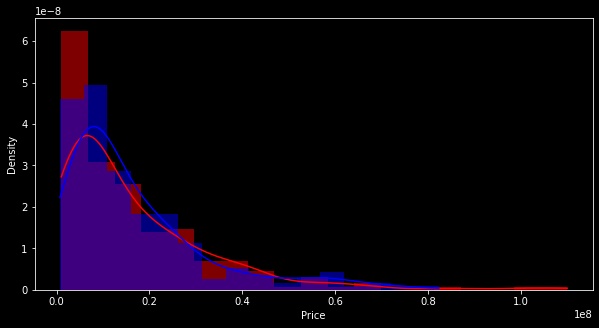

In [57]:
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
sns.histplot(y_test, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
sns.histplot(x_reg.predict(x_test), color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()